# 4. Evaluation
This notbook is used for analyzing the grid search and performing model selection 

In [160]:
%load_ext autoreload
%autoreload 2

In [161]:
encoder_name = "vit_iid"

### Take a look at some top models based on metrics

In [162]:
# from model_selection import top_model_confusion
# from utils import serialize, deserialize, serialize_model, deserialize_model
# import os

# metric_str = "precision"
# results_cache_dir = "/home/k2/K2/src/outputs/" + encoder_name + "_gridsearch/" + encoder_name + "-eval_results"
# model_cache_dir = "/home/k2/K2/src/outputs/" + encoder_name + "_gridsearch/" + encoder_name + "-fitted_k2_models"
# print(len(os.listdir(model_cache_dir)), "models from grid search")
# top_model_confusion(metric_str, results_cache_dir, model_cache_dir, return_all=True)

In [163]:
# valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
# for metric_str in valid_metrics:
#     print(metric_str)
#     results = top_model_confusion(metric_str,results_cache_dir, model_cache_dir)
#     print(results)


In [164]:
# valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
# for metric_str in valid_metrics:
#     print(metric_str)
#     results = top_model_confusion(metric_str, results_cache_dir, model_cache_dir, eval_class=0)
#     print(results)

In [165]:
# valid_metrics = ["msd", "specificity", "precision", "fnr", "fdr", "recall", "accuracy", "balanced_acc", "correlation", "threat_score", "prevalence", "dice", "jaccard"]
# for metric_str in valid_metrics:
#     print(metric_str)
#     results = top_model_confusion(metric_str, results_cache_dir, model_cache_dir, eval_class=1)
#     print(results)

In [166]:
# from model_selection import top_model_preds
# valid_metrics = ["auroc", "auprc", "ap"]
# for metric_str in valid_metrics:
#     print(metric_str)
#     results = top_model_preds(metric_str, results_cache_dir, model_cache_dir)
#     print(results)

In [167]:
# from model_selection import top_model_continuous_avg
# valid_metrics = ["auroc", "auprc", "ap"]
# for metric_str in valid_metrics:
#     print(metric_str)
#     results = top_model_continuous_avg(metric_str, results_cache_dir, model_cache_dir)
#     print(results)

In [168]:
# from model_selection import top_model_continuous_iid
# valid_metrics = ["auroc", "auprc", "ap"]
# linearized_cache_dir = "/home/k2/K2/src/outputs/" + encoder_name +  "_gridsearch/" + encoder_name + "-linearized_data"
# for metric_str in valid_metrics:
#     print(metric_str)
#     results = top_model_continuous_iid(metric_str, model_cache_dir, linearized_cache_dir)
#     print(results)

### Model selection
We now use the gridsearch to choose top AUPRC models

In [184]:
encoder = 'tile2vec' # clip, plip, tile2vec, vit_iid

# grid_dir = "/home/k2/K2/src/outputs/" + encoder + "_gridsearch/"
grid_dir = "/dfs/scratch1/gmachi/gcp_backup/k2/" + encoder + "_gridsearch/"

results_cache_dir = grid_dir + encoder + "-eval_results"
model_cache_dir = grid_dir + encoder + "-fitted_k2_models"
processor_cache_dir = grid_dir + encoder + "-fitted_k2_processors"
linearized_cache_dir = grid_dir + encoder + "-linearized_data"

In [185]:
key_conf_metrics = [] #["precision", "correlation", "dice"]
key_cont_metrics = ["auprc"]

In [186]:
from model_selection import top_model_confusion, top_model_continuous_avg
import pandas as pd

# conf_res = []
# for metric in key_conf_metrics:
#     print(metric)
#     res = top_model_confusion(metric,results_cache_dir, model_cache_dir, eval_class=1, return_all=True)
#     res["metric"] = [metric]*len(res)
#     conf_res.append(res)
# conf_res = pd.concat(conf_res)

cont_res = []
for metric in key_cont_metrics:
    print(metric)
    res = top_model_continuous_avg(metric, results_cache_dir, model_cache_dir, return_all=True)
    res["metric"] = [metric]*len(res)
    cont_res.append(res)
cont_res = pd.concat(cont_res)

auprc


In [187]:
# conf_pvt = conf_res.pivot(index=['model_name', 'threshold'], columns='metric', values='score')
# for met in key_conf_metrics:
#     rank = conf_pvt[met].rank(method='min', ascending=False)
#     conf_pvt[f'rank_{met}'] = rank
# # conf_pvt['rank'] = conf_pvt[key_conf_metrics].apply(tuple,axis=1).rank(method='dense',ascending=False)

# cont_pvt = cont_res.pivot(index='model_name', columns='metric', values='score')
# cont_pvt['rank_auprc'] = cont_pvt['auprc'].rank(method='min', ascending=False)

# merged = pd.merge(conf_pvt.reset_index(level=['threshold']), cont_pvt, on='model_name', how='left')
# merged['avg_rank'] = merged[[f'rank_{i}' for i in key_conf_metrics] + ['rank_auprc']].mean(axis=1)
# merged.sort_values('avg_rank').head(20)

In [188]:
# merged.max(axis=0)

In [189]:
cont_pvt = cont_res.pivot(index='model_name', columns='metric', values='score')
cont_pvt['rank_auprc'] = cont_pvt['auprc'].rank(method='min', ascending=False)
cont_pvt.sort_values('rank_auprc').head(20)

metric,auprc,rank_auprc
model_name,,
k15_r0_alpha0.010_tau2.00_lamnan.model,0.538680,1.0
k20_r0_alpha0.010_tau2.00_lamnan.model,0.538680,1.0
k20_r0_alpha0.050_tau2.00_lamnan.model,0.538680,1.0
k20_r0_alpha10000000000.000_tau2.00_lamnan.model,0.538680,1.0
k25_r0_alpha0.010_tau2.00_lamnan.model,0.538680,1.0
k25_r0_alpha0.025_tau2.00_lamnan.model,0.538680,1.0
k15_r0_alpha10000000000.000_tau2.00_lamnan.model,0.538680,1.0
k15_r0_alpha0.050_tau2.00_lamnan.model,0.538680,1.0
k25_r0_alpha0.050_tau2.00_lamnan.model,0.538680,1.0


In [190]:
import os
save_path = "/dfs/scratch1/gmachi/k2/K2/src/outputs/k2-train/gridesearch-auprc"
save_file = os.path.join(save_path, encoder+".csv")
cont_pvt.to_csv(save_file)

Reminder: Please run the above cells for all encoders -- Annotate the top models below:
- tile2vec: k15_r0_alpha0.010_tau2.00_lamnan.model
- vit: k10_r2_alpha0.010_tau2.00_lamnan.model
- CLIP: k20_r0_alpha0.050_tau2.00_lamnan.model
- PLIP: k10_r0_alpha0.010_tau2.00_lamnan.model

# analyzing grid search: silhouette vs training auprc

In [39]:
import os
from utils import deserialize_model
from sklearn.metrics import silhouette_samples, silhouette_score

In [43]:
modelstrs = ["tile2vec","vit_iid","clip","plip"]
mapping_path = None
embed_type = "dict"


In [70]:
sil_dict = {}

In [74]:
import os
from utils import deserialize_model
model_str = "plip"
proc_path = "/dfs/scratch1/gmachi/gcp_backup/k2/" + model_str + "_gridsearch/" + model_str + "-fitted_k2_processors"

S = {}
for proc_file in os.listdir(proc_path):
    proc_file = os.path.join(proc_path, proc_file)
    proc = deserialize_model(proc_file)
    k = proc.k
    cluster_labels = proc.quantizer.labels_
    X = proc.embedding_array
    s = silhouette_score(X, cluster_labels)
    S[k] = s
sil_dict[model_str] = S

/dfs/scratch1/gmachi/miniconda3/envs/kkenv/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dfs/scratch1/gmachi/miniconda3/envs/kkenv/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dfs/scratch1/gmachi/miniconda3/envs/kkenv/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KMeans from vers

In [75]:
sil_dict

{'vit_iid': {10: 0.3647240851163467,
  15: 0.3162938974287476,
  30: 0.23868303560815454,
  25: 0.2663106955546722,
  20: 0.26309249284113584},
 'tile2vec': {30: 0.4420643970765414,
  15: 0.4980078365027722,
  10: 0.5167613411526364,
  20: 0.4848224559221231,
  25: 0.46248168218180435},
 'clip': {10: 0.11862899488734147,
  20: 0.09489828053720029,
  25: 0.0887282808312751,
  30: 0.08710333712374545,
  15: 0.09407186461369971},
 'plip': {10: 0.13522270030643468,
  15: 0.1279088824115152,
  30: 0.10253938910429587,
  25: 0.10711353957387001,
  20: 0.11457200761487715}}

In [76]:
from utils import serialize
serialize(sil_dict, "/dfs/scratch1/gmachi/k2/K2/src/outputs/k2-train/silhouettes.obj")

Now we plot gridsearch models (train/validation) to see how AUPRC is related to k or Silhouette scores

In [124]:
import pandas as pd

In [125]:
tile_df = pd.read_csv("/dfs/scratch1/gmachi/k2/K2/src/outputs/k2-train/gridesearch-auprc/tile2vec.csv")
tile_df['k'] = pd.to_numeric(tile_df["model_name"].str.split("_").str[0].str.split("k").str[1])
tile_df["sil"] = tile_df["k"].map(sil_dict["tile2vec"])
tile_df["encoder"] = "tile2vec"

In [126]:
vit_df = pd.read_csv("/dfs/scratch1/gmachi/k2/K2/src/outputs/k2-train/gridesearch-auprc/vit_iid.csv")
vit_df['k'] = pd.to_numeric(vit_df["model_name"].str.split("_").str[0].str.split("k").str[1])
vit_df["sil"] = vit_df["k"].map(sil_dict["vit_iid"])
vit_df["encoder"] = "vit_iid"

In [127]:
clip_df = pd.read_csv("/dfs/scratch1/gmachi/k2/K2/src/outputs/k2-train/gridesearch-auprc/clip.csv")
clip_df['k'] = pd.to_numeric(clip_df["model_name"].str.split("_").str[0].str.split("k").str[1])
clip_df["sil"] = clip_df["k"].map(sil_dict["clip"])
clip_df["encoder"] = "clip"

In [128]:
plip_df = pd.read_csv("/dfs/scratch1/gmachi/k2/K2/src/outputs/k2-train/gridesearch-auprc/plip.csv")
plip_df['k'] = pd.to_numeric(plip_df["model_name"].str.split("_").str[0].str.split("k").str[1])
plip_df["sil"] = plip_df["k"].map(sil_dict["plip"])
plip_df["encoder"] = "plip"

In [129]:
df_merged = pd.concat([tile_df, vit_df, clip_df, plip_df], ignore_index=True, sort=False)
df_merged


,model_name,auprc,rank_auprc,k,sil,encoder
0,k10_r0_alpha0.010_tau0.00_lamnan.model,0.101451,258.0,10,0.516761,tile2vec
1,k10_r0_alpha0.010_tau1.00_lamnan.model,0.111081,178.0,10,0.516761,tile2vec
2,k10_r0_alpha0.010_tau2.00_lamnan.model,0.538680,1.0,10,0.516761,tile2vec
3,k10_r0_alpha0.025_tau0.00_lamnan.model,0.097135,275.0,10,0.516761,tile2vec
4,k10_r0_alpha0.025_tau1.00_lamnan.model,0.111081,179.0,10,0.516761,tile2vec
...,...,...,...,...,...,...
1317,k30_r8_alpha0.050_tau2.00_lamnan.model,0.311171,142.0,30,0.102539,plip
1318,k30_r8_alpha10000000000.000_tau0.00_lamnan.model,0.269484,269.0,30,0.102539,plip
1319,k30_r8_alpha10000000000.000_tau1.00_lamnan.model,0.276215,242.0,30,0.102539,plip
1320,k30_r8_alpha10000000000.000_tau2.00_lamnan.model,0.311171,142.0,30,0.102539,plip


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
def setup_figure(width=6, height=3):
    sns.set(style='white')
    sns.set_context('paper')
    plt.figure(figsize=(width,height))

/dfs/scratch1/gmachi/miniconda3/envs/kkenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/dfs/scratch1/gmachi/miniconda3/envs/kkenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


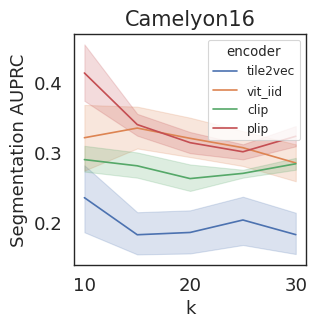

In [159]:
setup_figure(3,3)
g = sns.lineplot(data=df_merged, x="k", y="auprc", hue="encoder")
# sns.scatterplot(data=df_merged, x="k", y="auprc", hue="encoder")
# g.set_xscale("log")
# g.set_yscale("log")
# ax2 = plt.twinx()
# sns.lineplot(data=df_merged, x="k", y="sil", hue="encoder", ax=ax2)
# _ = g.set(xlabel="k", ylabel="Segmentation AUPRC")
g.set_title("Camelyon16", fontsize=15)
# plt.title("Hi", fontsize=15)
g.set_xlabel('k', fontsize=13)
g.set_ylabel('Segmentation AUPRC', fontsize=13)
g.tick_params(labelsize=13)

In [152]:
# g = sns.lineplot(data=df_merged, x="sil", y="auprc", hue="encoder")
# g.set_xscale("log")
# # g.set_yscale("log")
# # ax2 = plt.twinx()
# # sns.lineplot(data=plip_df, x="k", y="sil", ax=ax2)
# _ = g.set(xlabel="Silhouette Score", ylabel="Segmentation AUPRC")
# g.set_title("Impact of Silhouette on segmentation")